坐标系: EPSG:28992
边界范围: [136986.272 467810.02  145018.739 475026.286]


c:\Users\Jingqi\anaconda3\envs\geospatial\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jingqi\anaconda3\envs\geospatial\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


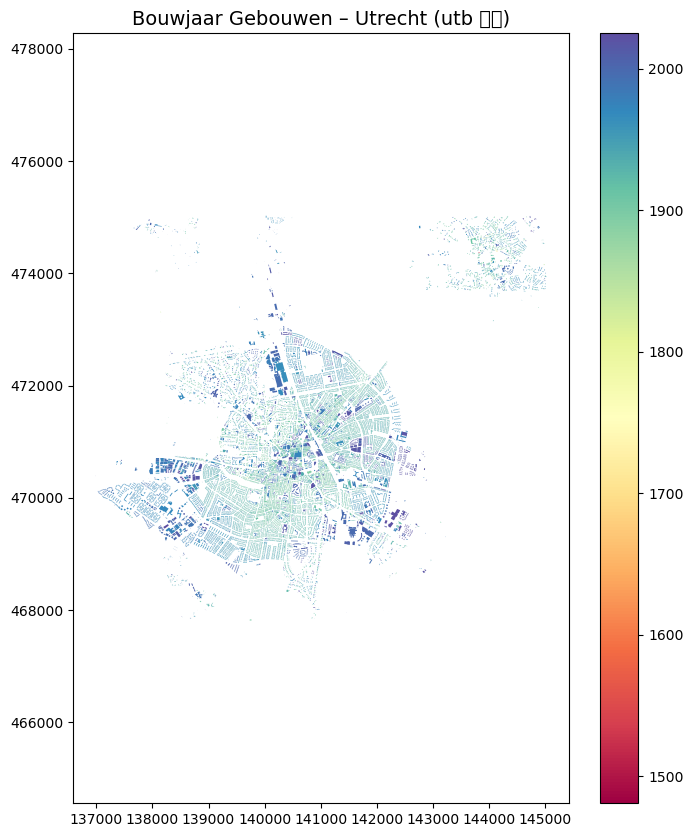

In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 读取建筑数据
utb = gpd.read_file("utb.shp")
print("坐标系:", utb.crs)
print("边界范围:", utb.total_bounds)  # minx, miny, maxx, maxy

# 绘制
fig, ax = plt.subplots(figsize=(8, 10))
utb.plot(column="bouwjaar", cmap="Spectral", legend=True, ax=ax, linewidth=0)
ax.set_title("Bouwjaar Gebouwen – Utrecht (utb 数据)", fontsize=14)
plt.axis("equal")
plt.show()


c:\Users\Jingqi\anaconda3\envs\geospatial\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35009 (\N{CJK UNIFIED IDEOGRAPH-88C1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jingqi\anaconda3\envs\geospatial\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25481 (\N{CJK UNIFIED IDEOGRAPH-6389}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jingqi\anaconda3\envs\geospatial\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32422 (\N{CJK UNIFIED IDEOGRAPH-7EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jingqi\anaconda3\envs\geospatial\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jingqi\anaconda3\envs\geospatial\Lib\site-packages\IPython\core\pylabtools.py:170: User

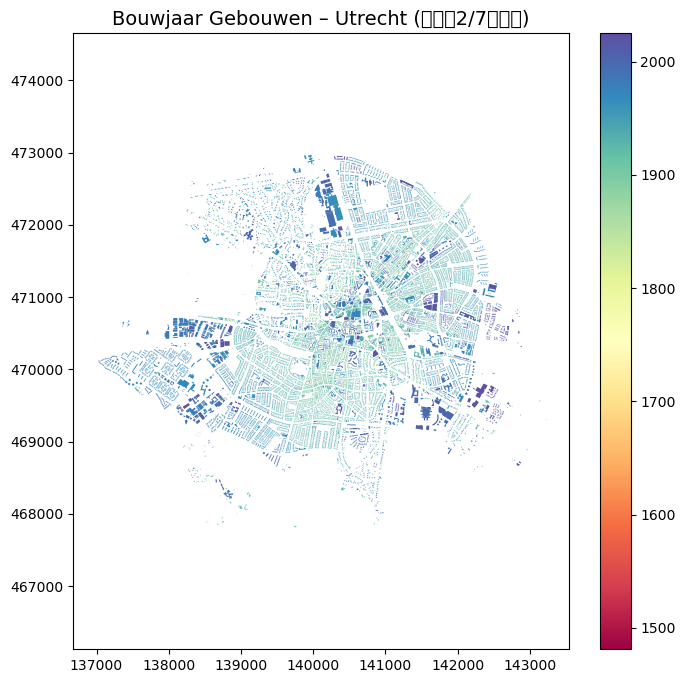

In [20]:
# 限制显示范围，保留 5/7 高度
minx, miny, maxx, maxy = utb.total_bounds
new_top = maxy - (maxy - miny) * (2 / 7)  # 向下裁掉顶部 2/7
utb_clip = utb.cx[minx:maxx, miny:new_top]

# 再画图
fig, ax = plt.subplots(figsize=(8, 8))
utb_clip.plot(column="bouwjaar", cmap="Spectral", legend=True, ax=ax, linewidth=0)
ax.set_title("Bouwjaar Gebouwen – Utrecht (裁掉约2/7高度后)", fontsize=14)
plt.axis("equal")
plt.show()

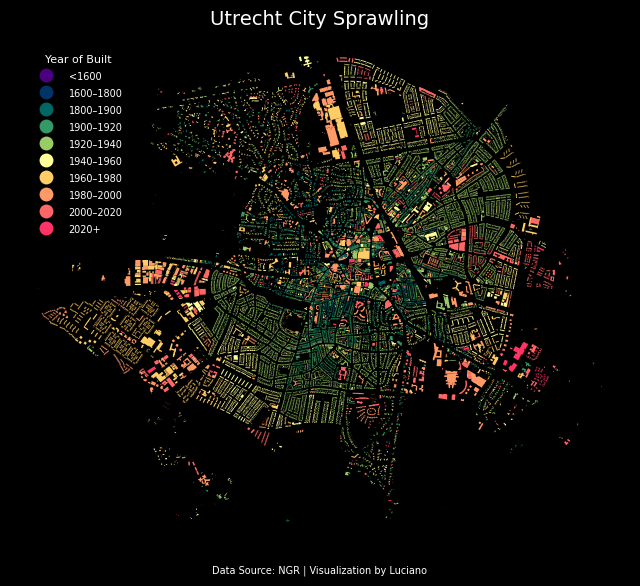

In [28]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import geopandas as gpd
import pandas as pd

# 读取数据
utb = gpd.read_file("utb.shp")

# 分箱（同前）
bins = [0, 1600, 1800, 1900, 1920, 1940, 1960, 1980, 2000, 2020, 2100]
labels = ["<1600", "1600–1800", "1800–1900", "1900–1920", "1920–1940",
           "1940–1960", "1960–1980", "1980–2000", "2000–2020", "2020+"]
utb["bouw_period"] = pd.cut(utb["bouwjaar"], bins=bins, labels=labels)

# 调整范围（上下留白较少）
minx, miny, maxx, maxy = utb.total_bounds
cut_height = (maxy - miny) * (2 / 7)
new_top = maxy - cut_height  # 去掉上方 2/7

# 应用新的裁剪
crop = utb.cx[minx:maxx, miny:new_top]

# 亮色调适配暗背景
colors = [
    "#4B0082", "#003366", "#006666", "#339966", "#99cc66",
    "#ffff99", "#ffcc66", "#ff9966", "#ff6666", "#ff3366"
]
cmap = mcolors.ListedColormap(colors)

# 黑底可视化
fig, ax = plt.subplots(figsize=(8, 8), facecolor="black")
ax.set_facecolor("black")

# 绘图
crop.plot(
    column="bouw_period",
    cmap=cmap,
    linewidth=0,
    legend=True,
    legend_kwds={'title': "Year of Built", 'fontsize': 9, 'title_fontsize': 10},
    ax=ax
)

# 去掉边框与坐标
ax.axis("off")
ax.set_title("Utrecht City Sprawling", fontsize=14, color="white")
#author Luciano
ax.text(
    0.5, -0.05,
    "Data Source: NGR | Visualization by Luciano",
    fontsize=7,
    color="white",
    ha="center",
    va="center",
    transform=ax.transAxes
)

# Legend 美化：去掉灰色背景框
leg = ax.get_legend()
leg.get_frame().set_facecolor("none")
leg.get_frame().set_edgecolor("none")
for text in leg.get_texts():
    text.set_color("white")
    text.set_fontsize(7)        # 小两号
leg.get_title().set_color("white")
leg.get_title().set_fontsize(8) # 小两号

# 调整位置（左上角）
leg.set_bbox_to_anchor((0.02, 0.98))  # x=0.02 靠左, y=0.98 顶部
leg._loc = 2  # 2 表示 upper left

plt.show()

